<a href="https://colab.research.google.com/github/hoseinm444/FanapExercises/blob/main/Ex10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exe10


##01

If we have a point with coordinates (x=5, y=6) in the image space. Find the line
corresponding to this point in MC space ( Slope and Intercept space), and the sinusoid corresponding to this point in Rho-Theta Space.(Obtain the Equations and Plot them)

In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [83]:
def show_img_plt(img, fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img,cmap='gray', vmin=vmin, vmax=vmax)

In [84]:
def show_mult_img_plt(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i],cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

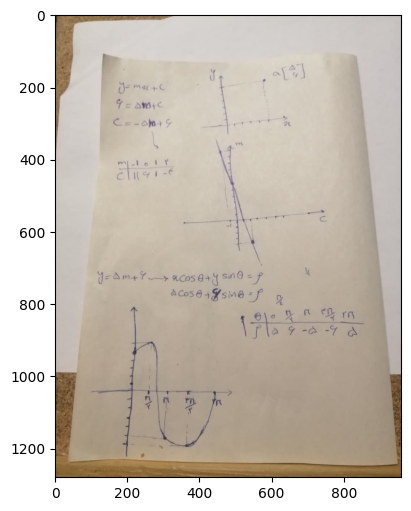

In [85]:
question_1 = cv2.imread(r'photo10135220184.jpg',-1)
img = cv2.cvtColor(question_1,cv2. COLOR_BGR2RGB)
show_img_plt(img)

##02

2. Find and plot the lines in the image (a.jpg), for edges with intensity more than 150. and Votes more than 200, show the line with thickness = 2, and with the color pure green! (Lower threshold for canny = 100, Other parameters = Desired)

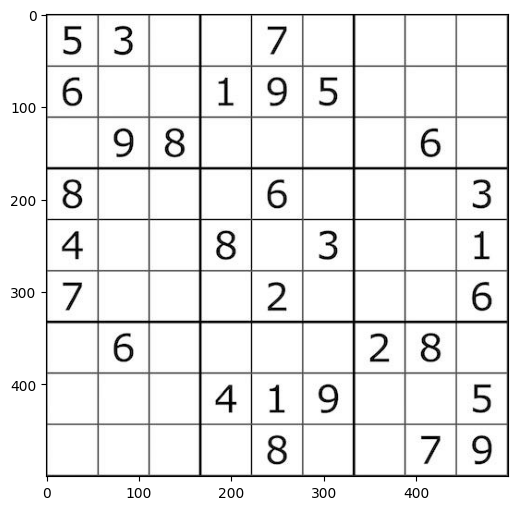

In [86]:
image = cv2.imread(r'a.jpg',-1)
image_to_RGB = cv2.cvtColor(image,cv2. COLOR_BGR2RGB)
show_img_plt(image_to_RGB)

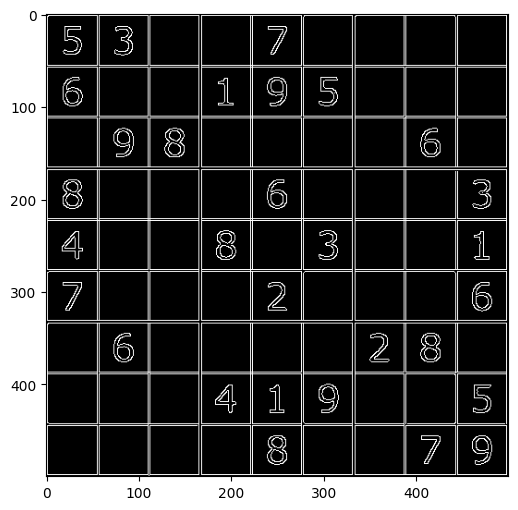

In [87]:
canny = cv2.Canny(image_to_RGB,100,150)
show_img_plt(canny)

In [88]:
#vote
hough_lines = cv2.HoughLines(canny, 1, np.pi/180, 200)
#print(hough_lines)

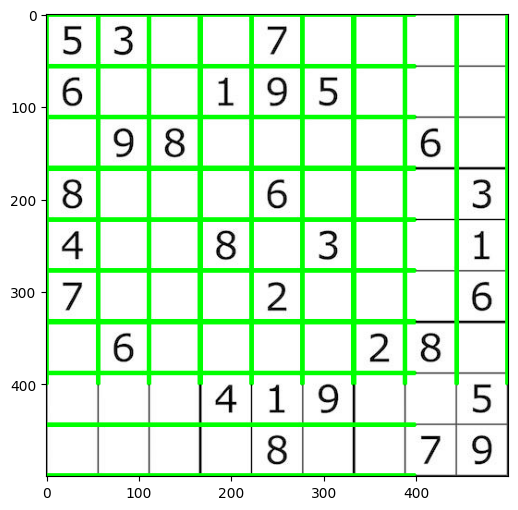

In [89]:
L = 400

for line in hough_lines:
    rho, theta = line[0]

    a = np.cos(theta)
    b = np.sin(theta)


    y0 =  rho * b
    x0 = rho * a

    x1 = int (x0 + L*(b))
    y1 = int (y0 - L*(a))

    x2 = int(x0 - L*(b))
    y2 = int(y0 + L*(a))

    cv2.line(image_to_RGB, (x1, y1), (x2, y2), (0, 255, 0), 2)


show_img_plt(image_to_RGB)